# Project: Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, you and your friend decide to break into the industry and open up your own restaurant, Danielle's Delicious Delicacies. Since a restaurant's success is highly correlated with its reputation, you want to make sure Danielle's Delicious Delicacies has the best reviews on the most queried restaurant review site: Yelp! While you know your food will be delicious, you think there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, you decide to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project we'll be working with a real dataset provided by Yelp. We have provided six files, listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).

Let's get started by exploring the data in each of these files to see what we are working with.

## Load the Data and Take a Peek



In [36]:
import pandas as pd


In [37]:
businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

In order to more clearly see the information in our DataFrame, we can adjust the number of columns shown (`max_columns`) and the number of characters shown in a column (`max_colwidth`) with the below code:

```python
pd.options.display.max_columns = number_of_columns_to_display
pd.options.display.max_colwidth = number_of_characters_to_display
```

Set `max_columns` to `60` and `max_colwidth` to `500`. We are working with some BIG data here!

In [38]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500


In [39]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [40]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [41]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [42]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [43]:
tips.head()


,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [44]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


How many different businesses are in the dataset? 

In [45]:
print(len(businesses))


188593


## Merge the Data

Since we are working with data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. We can do this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In our case, this unique identifying column is the `business_id`.


In [46]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

print(len(df))
print(df.columns)


188593
Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')


## Clean the Data

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project with will also be working with some features that are binary, on the scale [0,1]. With this information, we can remove any columns in the dataset that are not continuous or binary, and that we do not want to make predictions on. 

In [47]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']

df.drop(labels=features_to_remove, axis=1, inplace=True)

In [48]:


df.isna().any()


alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

In [49]:
df.fillna({'weekday_checkins': 0,
           'weekend_checkins': 0,
           'average_tip_length': 0,
           'number_tips': 0,
           'average_caption_length': 0,
           'number_pics': 0},
          inplace=True)


## Exploratory Analysis

Now that our data is all together, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in our DataFrame). The features with the best correlations could prove to be the most helpful for our Linear Regression model! Pandas DataFrames have a really helpful method, `.corr()`, that allows us to see the correlation coefficients for each pair of our different features. Remember, a correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship. Call `.corr()` on `df`. You'll see that `number_funny_votes` has a correlation coefficient of `0.001320` with respect to `stars`, our Yelp rating. This is a very weak correlation. What features best correlate, both positively and negatively, with Yelp rating?

In [50]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To further visualize these relationships, we can plot certain features against our dependent variable, the Yelp rating. 


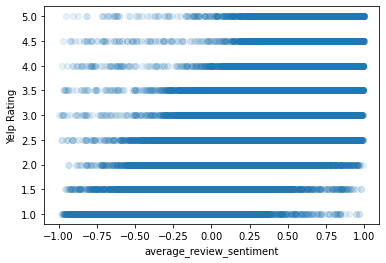

In [51]:
from matplotlib import pyplot as plt

# average_review_sentiment against stars 
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.1)
plt.xlabel('average_review_sentiment')
plt.ylabel('Yelp Rating')
plt.show()


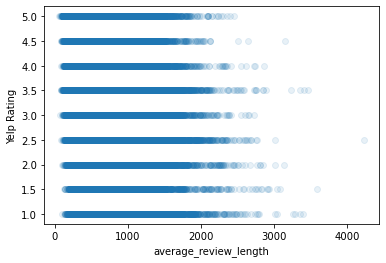

In [52]:
# average_review_length against stars here
plt.scatter(df['average_review_length'], df['stars'], alpha=0.1)
plt.xlabel('average_review_length')
plt.ylabel('Yelp Rating')
plt.show()


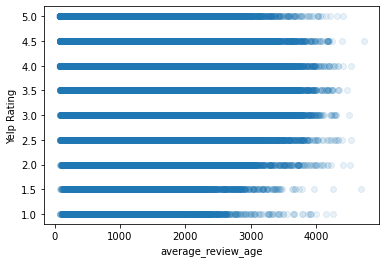

In [53]:
# average_review_age against stars here
plt.scatter(df['average_review_age'], df['stars'], alpha=0.1)
plt.xlabel('average_review_age')
plt.ylabel('Yelp Rating')
plt.show()


## Data Selection

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings. From our correlation analysis we saw that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. Since we want to dig a little deeper than `average_review_sentiment`, which understandably has a very high correlation with Yelp rating, let's choose to create our first model with `average_review_length` and `average_review_age` as features.

In [54]:
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

We will use scikit-learn's `train_test_split` function to do this split. The optional parameter `

1. The training data (features), which we can assign to `X_train`
2. The testing data (features), which we can assign to `X_test`
3. The training dependent variable (Yelp rating), which we can assign to `y_train`
4. The testing dependent variable (Yelp rating), which we can assign to `y_test`

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)



## Create and Train the Model

Now that our data is split into training and testing sets, we can create our model.

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

## Evaluate and Understand the Model

Now we can evaluate our model using the `.score()` method, which provides the R^2 value for our model. 

In [57]:
model.score(X_train, y_train)


0.08250309566544889

In [58]:
model.score(X_test, y_test)


0.08083081210060561

In [59]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074543),
 ('average_review_age', -0.00011621626836366476)]

Lastly we can calculate the predicted Yelp ratings for our testing data and compare them to their actual Yelp ratings. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`, indicating homoscedasticity. 

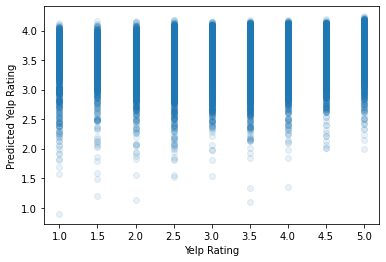

In [60]:
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted, alpha=0.1)
plt.xlabel('Yelp Rating')
plt.ylabel('Predicted Yelp Rating')

plt.show()


## Define Different Subsets of Data

After evaluating the first model, we can see that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features and see if we can achieve a more accurate model.

In [61]:
# subset of only average review sentiment
sentiment = ['average_review_sentiment']

In [70]:
# all features
all_features = ['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
                                  'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


## Further Modeling

Now that we have lists of different feature subsets, we can create new models from them. In order to more easily compare the performance of these new models, a function called `model_features()` was created to replicate the model building process.

In [71]:
import numpy as np

def model_features(feature_list):
    
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    

    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    y_predicted = model.predict(X_test)
    
    plt.scatter(y_test,y_predicted, alpha=0.1)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Once you feel comfortable with the steps of the function, run models on the following subsets of data using `model_these_features()`:
* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: your own feature subset

How does changing the feature sets affect the model's R^2 value? Which features are most important to predicting Yelp rating in the different models? Which models appear more or less homoscedastic?

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.3033908433749586)]


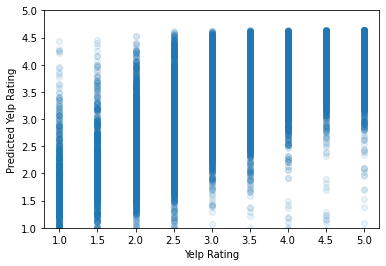

In [72]:
# create a model on sentiment here
model_features(sentiment)

Train Score: 0.6807828861895333
Test Score: 0.6782129045869245
[('average_review_sentiment', 2.280845699662378), ('alcohol?', -0.14991498593470778), ('has_wifi', -0.12155382629262777), ('good_for_kids', -0.11807814422012647), ('price_range', -0.06486730150041178), ('average_number_years_elite', -0.0627893971389538), ('has_bike_parking', 0.027296969912285574), ('takes_credit_cards', 0.02445183785362615), ('take_reservations', 0.014134559172970311), ('number_pics', -0.0013133612300815713), ('average_number_fans', 0.0010267986822657448), ('number_cool_votes', 0.000972372273441118), ('number_tips', -0.0008546563320877247), ('average_caption_length', -0.0006472749798191067), ('average_review_length', -0.0005896257920272376), ('average_tip_length', -0.00042052175034057535), ('number_useful_votes', -0.00027150641256160215), ('average_review_count', -0.00023398356902509327), ('average_review_age', -0.00015776544111326904), ('average_days_on_yelp', 0.00012326147662885747), ('review_count', 0.00

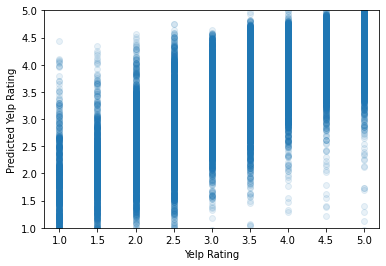

In [73]:
# create a model on all features here
model_features(all_features)


## Danielle's Delicious Delicacies' Debut

We have loaded the data, cleaned it, modeled it, and evaluated it. You close your eyes and can clearly see opening day of Danielle's Delicious Delicacies with a line out the door. But what will your Yelp rating be? Let's use our model to make a prediction.

In [74]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

To give  some perspective on the restaurants already out there, we have provided the mean, minimum, and maximum values for each feature below. Will Danielle's Delicious Delicacies be just another average restaurant, or will it be a 5 star behemoth amongst the masses?

In [75]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Based on your plans for the restaurant, how you expect your customers to post on your Yelp page, and the values above, fill in the blanks in the NumPy array below with your desired values. The first blank corresponds with the feature at `index=0` in the DataFrame above, `alcohol?`, and the last blank corresponds to the feature at ``index=24``, `weekend_checkins`. Make sure to enter either `0` or `1` for all binary features, and if you aren't sure of what value to put for a feature, select the mean from the DataFrame above. After you enter the values, run the prediction cell below to receive your Yelp rating! How is Danielle's Delicious Delicacies debut going to be?

In [ ]:
danielles_delicious_delicacies = np.array([_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_,_]).reshape(1,-1)

In [ ]:
model.predict(danielles_delicious_delicacies)